In [3]:
import shap
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

In [4]:
# Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='Species')

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [5]:
# Initialize and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Explain the model's predictions using SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

In [7]:
# Plot the SHAP values for one prediction
shap.initjs()  # Required for JS visualization in Jupyter notebooks
shap.force_plot(explainer.expected_value[0], shap_values[0][0], X_test.iloc[0])

## How to interpret it:

__Base Value__: This is the average model output over the dataset that was used by the SHAP explainer during initialization. You can think of it as the starting point before considering the effect of each individual feature in the instance being explained.

__Output Value (f(x))__: This is the actual prediction for the instance being explained by the plot. It's the final output of the model after considering the contribution of each feature.

__Feature Values__: In the plot, you can see two features: "petal length (cm)" and "petal width (cm)", with numerical values next to them indicating the actual measured value for these features in the instance being explained (4.7 and 1.2 respectively).

__Red and Blue Arrows (SHAP Values)__: The length of these arrows indicates the magnitude of the impact of each feature on the model's prediction.

__Blue Arrows__: They represent features that are pushing the prediction to be lower than the base value. In this case, "petal width (cm)" with a value of 1.2 is pushing the prediction lower.
Red Arrows: These are features that push the prediction higher. Here, "petal length (cm)" with a value of 4.7 is pushing the prediction higher.
Higher ⇨ Lower: This shows the direction of the prediction. If the features are pushing the prediction to the right (red), it means they are contributing to a higher prediction value. Conversely, if they push to the left (blue), they contribute to a lower prediction value.

__Color Intensity__: The color intensity corresponds to the feature value's impact. A deeper color means a stronger impact on the model's output.

In summary, the force plot is telling us that for this particular instance, the petal length of 4.7 cm is contributing to a higher prediction value, while the petal width of 1.2 cm is contributing to a lower prediction value compared to the base value. The combined effect of these feature contributions results in the final prediction (f(x)), which is shown on the plot as the point where all feature arrows converge.

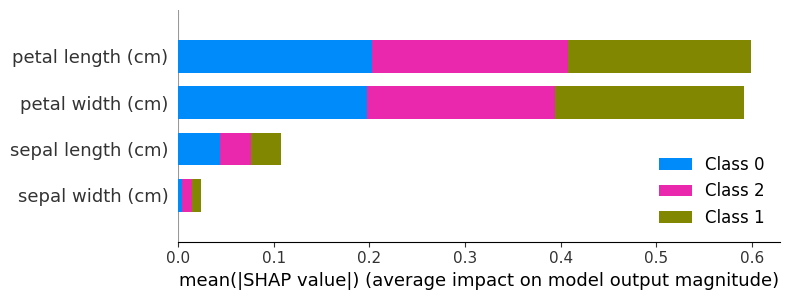

In [8]:
# Plot summary plot using SHAP values for all predictions
shap.summary_plot(shap_values, X_test)

## How to interpret it:

- The SHAP summary plot visualizes the impact of each feature on the model's output.
- Each row represents a feature (`petal length`, `petal width`, `sepal length`, `sepal width`) of the Iris dataset.
- The x-axis shows the mean absolute value of the SHAP values for each feature across all data points. This represents the average impact on the model output magnitude.

## Feature Contributions:

### Petal Length (cm)
- **Class 0**: Has a moderately negative impact (blue).
- **Class 2**: Has a significant positive impact (magenta).
- **Class 1**: Has a moderate positive impact (green).

### Petal Width (cm)
- **Class 0**: Shows a negative impact (blue).
- **Class 2**: Has a strong positive impact (magenta).
- **Class 1**: Has a negligible impact (green).

### Sepal Length (cm)
- **Class 0**: Shows a small positive impact (blue).
- **Class 2**: Shows a negligible impact (magenta).
- **Class 1**: Shows a negligible impact (green).

### Sepal Width (cm)
- **Class 0**: Shows a very small positive impact (blue).
- **Class 2**: Has a negligible impact (magenta).
- **Class 1**: Has a negligible impact (green).

## Observations:

- `Petal length` and `petal width` are the most influential features.
- Class 2 is most influenced by `petal length` and `petal width`, while these features have a negative impact on Class 0 predictions.
- `Sepal length` and `sepal width` have a much smaller influence on the model's output compared to petal features.


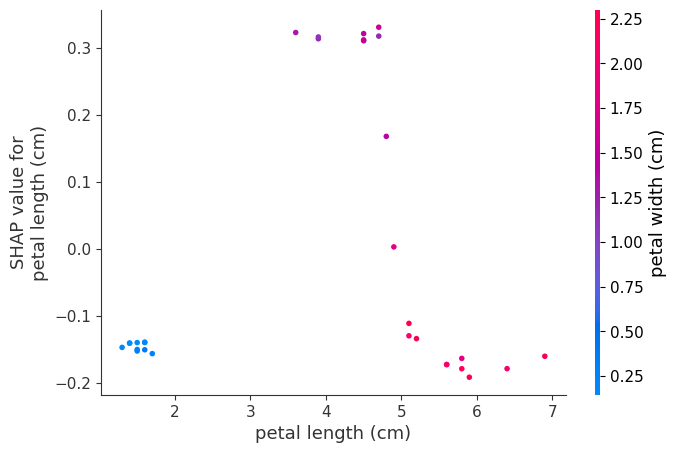

In [9]:
# Plot dependence plot for a specific feature
shap.dependence_plot("petal length (cm)",
                     shap_values[1],
                     X_test,
                     interaction_index="petal width (cm)")

## How to interpret it:

- The plot illustrates the relationship between `petal length (cm)` and its SHAP values.
- The x-axis corresponds to the actual values of `petal length (cm)` within the dataset.
- The y-axis indicates the SHAP values for the feature `petal length (cm)`, which quantify the impact of this feature on the model's prediction.
- The color scale on the right represents the `petal width (cm)`, suggesting that the SHAP values are also influenced by this second feature.

## Observations:

- There is a cluster of points with `petal length (cm)` below 2.5, which have negative SHAP values, indicating they reduce the predicted output.
- As the `petal length (cm)` increases, the SHAP values also tend to increase, showing a positive correlation with the model's prediction.
- The coloring of the points suggests that the `petal width (cm)` may interact with `petal length (cm)`, as different `petal width (cm)` values correspond to different SHAP values for similar `petal length (cm)` values.

## Conclusion:

- `Petal length (cm)` significantly influences the model's prediction, especially for larger values.
- There seems to be an interaction effect with `petal width (cm)` that further affects the SHAP value, as indicated by the varying colors across the plot's points.


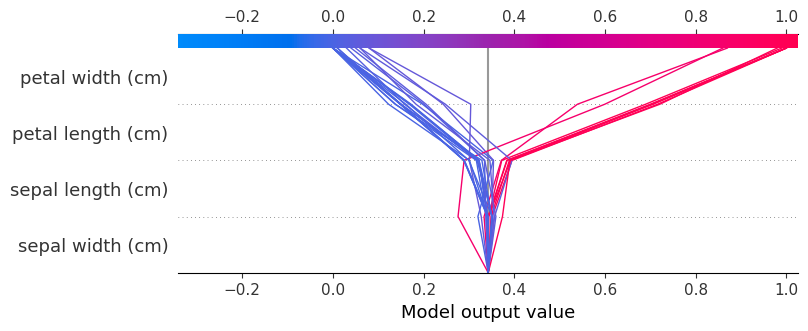

In [10]:
# Plotting a SHAP decision plot
shap.decision_plot(explainer.expected_value[1], shap_values[1], X_test)

## How to interpret it:

- This decision plot shows how each feature contributes to shifting the model's output from the base value (the model's average prediction over the dataset) to the final prediction for specific instances.
- The x-axis denotes the model output value, which can be interpreted as the probability of a particular class in a classification setting.
- Each line represents an individual prediction's path from the base value to the model output value, with the color indicating the feature's contribution.

## Feature Contributions:

### Petal Width (cm)
- Starts by contributing negatively (moving the prediction to the left) but then shifts to provide positive contributions (moving to the right).

### Petal Length (cm)
- Consistently provides positive contributions (moving the prediction to the right).

### Sepal Length (cm)
- Shows varying impact, with most contributions being positive.

### Sepal Width (cm)
- Generally has a minor negative contribution across different predictions.

## Observations:

- The plot suggests `petal width (cm)` and `petal length (cm)` are the most influential features.
- The separation between lines towards the right side implies that different instances have varied feature impacts leading to different predictions.
- The convergence of lines towards the right side indicates a strong positive contribution from features, especially `petal length (cm)`.

## Conclusion:

- The decision plot provides a detailed view of how each feature affects the prediction for individual instances, highlighting the importance of `petal` measurements in the Iris dataset classification.
